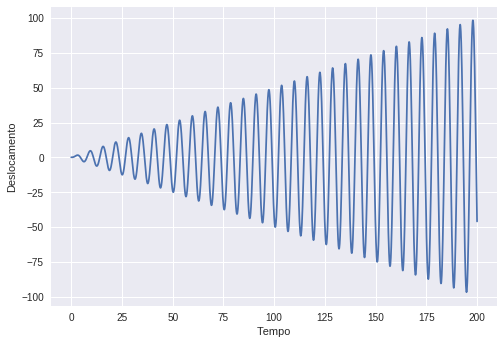

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import math

step = 0.1
T = 200.0
beta = 0.25
gama = 0.5
K = 1.0
M = 1.0
P0 = 1.0
C = 0.0

def charge_function(x) :
  return math.sin(x)

aceleracao = []
deslocamento = []
deslocamento_intermediario = []
velocidade = []
velocidade_intermediaria = []


i = 0.0

period = 6.28
freq = 1/period
omega = 2*3.1416*freq

P = P0*charge_function(omega*i)


velocidade.append(0.0)
deslocamento.append(0.0)
if M == 0.0 :
  aceleracao.append(P-K*deslocamento[0])
else :
  aceleracao.append((P-K*deslocamento[0])/M)
velocidade_intermediaria.append(0.0)
deslocamento_intermediario.append(0.0)


i += step
n = 0
while i < T :
  A1 = deslocamento[n]
  A2 = step*velocidade[n]
  A3 = (1-2*beta)
  A4 = (step**2)/2
  A5 = aceleracao[n]*A3*A4
  A6 = A1+A2+A5
  deslocamento_intermediario.append(A6)
  A1 = velocidade[n]
  A2 = step*(1-gama)*aceleracao[n]
  A3 = A1+A2
  velocidade_intermediaria.append(A3)
  aux = (M+gama*step*C+beta*(step**2)*K)
  if aux == 0.0 :
    aux = 1
  P = P0*charge_function(omega*i)
  aceleracao.append((P-C*velocidade_intermediaria[n+1]-K*deslocamento_intermediario[n+1])/aux)
  deslocamento.append(deslocamento_intermediario[n+1]+aceleracao[n+1]*beta*(step**2))
  velocidade.append(velocidade_intermediaria[n+1]+aceleracao[n+1]*gama*step)
  i += step
  n += 1
  
  
x_axes = np.arange(0.0, T+step, step)

plt.plot(x_axes, deslocamento)
plt.xlabel("Tempo")
plt.ylabel("Deslocamento")
plt.show()

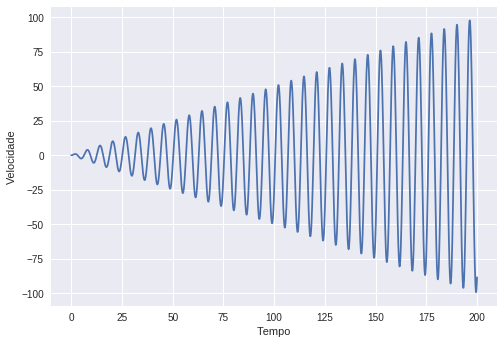

In [11]:
plt.plot(x_axes, velocidade)
plt.xlabel("Tempo")
plt.ylabel("Velocidade")
plt.show()


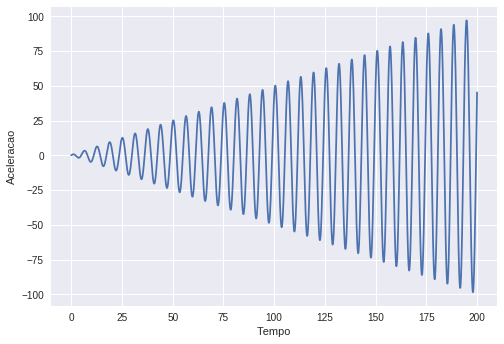

In [12]:
plt.plot(x_axes, aceleracao)
plt.xlabel("Tempo")
plt.ylabel("Aceleracao")
plt.show()